In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
torch.manual_seed(1)

In [1]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable


x_range_1 = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
y_sinc = np.sinc(5 * x_range_1)


x_tensor_1, y_tensor_sinc = torch.tensor(x_range_1, dtype=torch.float32), torch.tensor(y_sinc, dtype=torch.float32)

x_range_2 = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
y_sign = np.sign(np.sin(5 * np.pi * x_range_2))


x_tensor_2, y_tensor_sign = torch.tensor(x_range_2, dtype=torch.float32), torch.tensor(y_sign, dtype=torch.float32)


In [2]:
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(1, 5), nn.LeakyReLU(),
            nn.Linear(5, 10), nn.LeakyReLU(),
            nn.Linear(10, 10), nn.LeakyReLU(),
            nn.Linear(10, 10), nn.LeakyReLU(),
            nn.Linear(10, 10), nn.LeakyReLU(),
            nn.Linear(10, 5), nn.LeakyReLU(),
            nn.Linear(5, 1)
        )

    def forward(self, x):
        return self.seq(x)

class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(1, 10), nn.LeakyReLU(),
            nn.Linear(10, 18), nn.LeakyReLU(),
            nn.Linear(18, 15), nn.LeakyReLU(),
            nn.Linear(15, 4), nn.LeakyReLU(),
            nn.Linear(4, 1)
        )

    def forward(self, x):
        return self.seq(x)

class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(1, 190), nn.LeakyReLU(),
            nn.Linear(190, 1)
        )

    def forward(self, x):
        return self.seq(x)


In [3]:
def model_train(model, x, y):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
    loss_func = torch.nn.MSELoss()
    max_epoch = 20000
    epoch_arr, loss_arr = [], []

    for epoch in range(max_epoch):
        prediction = model(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_arr.append(epoch + 1)
        loss_arr.append(loss.item())

        if (epoch + 1) % 500 == 0 or epoch in [0, max_epoch - 1]:
            print(f'Epoch: {epoch + 1}, Loss: {loss.item():.6f}')

        if epoch > 5 and loss.item() < 0.001 and np.abs(np.diff(loss_arr[-3:])).max() < 1e-5:
            print("Convergence reached at epoch", epoch + 1)
            break

    return epoch_arr, loss_arr, prediction


Epoch: 1, Loss: 0.061458
Epoch: 500, Loss: 0.007911
Epoch: 1000, Loss: 0.005119
Epoch: 1500, Loss: 0.004605
Epoch: 2000, Loss: 0.003617
Epoch: 2500, Loss: 0.003554
Epoch: 3000, Loss: 0.003536
Epoch: 3500, Loss: 0.003514
Epoch: 4000, Loss: 0.003059
Epoch: 4500, Loss: 0.003034
Epoch: 5000, Loss: 0.003030
Epoch: 5500, Loss: 0.003027
Epoch: 6000, Loss: 0.003045
Epoch: 6500, Loss: 0.003026
Epoch: 7000, Loss: 0.003029
Epoch: 7500, Loss: 0.003025
Epoch: 8000, Loss: 0.002037
Epoch: 8500, Loss: 0.001689
Epoch: 9000, Loss: 0.001466
Epoch: 9500, Loss: 0.001223
Convergence reached at epoch 9814


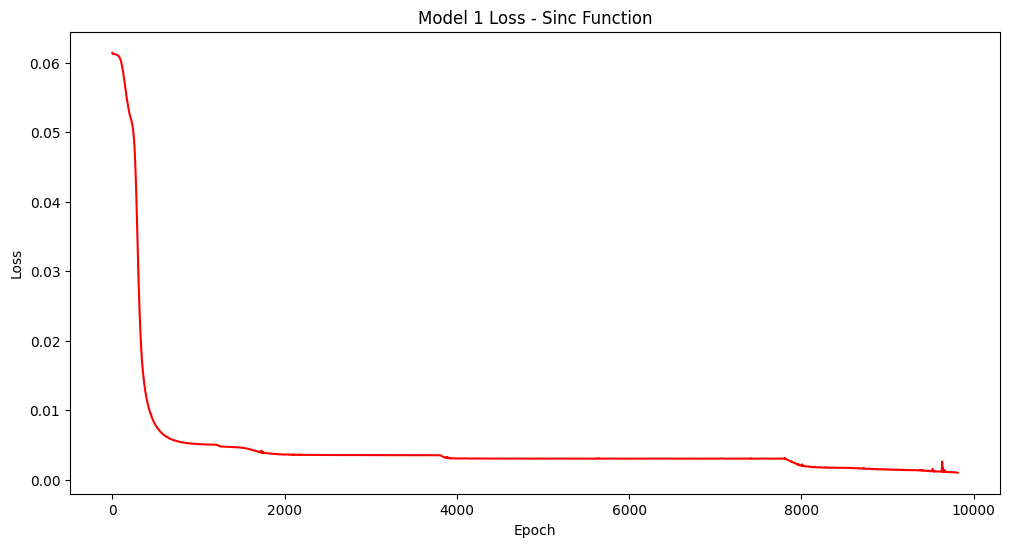

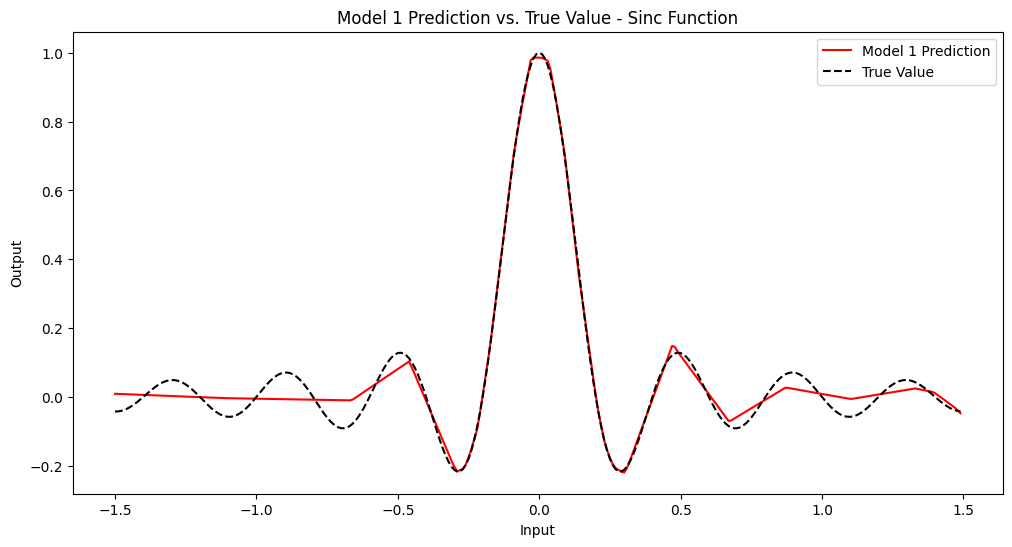

In [4]:
model_sign_1 = Model1()
m1_epoch_arr, m1_loss_arr, m1_prediction = model_train(model_sign_1, x_tensor_1, y_tensor_sinc)

plt.figure(figsize=(12,6))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "r")
plt.title('Model 1 Loss - Sinc Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(x_tensor_1.numpy(), m1_prediction.data.numpy(), color="r", label='Model 1 Prediction')
plt.plot(x_tensor_1.numpy(), y_tensor_sinc.numpy(), color="black", linestyle='--', label='True Value')
plt.title('Model 1 Prediction vs. True Value - Sinc Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()


Epoch: 1, Loss: 0.154165
Epoch: 500, Loss: 0.014364
Epoch: 1000, Loss: 0.003225
Epoch: 1500, Loss: 0.003123
Epoch: 2000, Loss: 0.003097
Epoch: 2500, Loss: 0.003089
Epoch: 3000, Loss: 0.003026
Epoch: 3500, Loss: 0.002923
Epoch: 4000, Loss: 0.002847
Epoch: 4500, Loss: 0.002806
Epoch: 5000, Loss: 0.002807
Epoch: 5500, Loss: 0.002769
Epoch: 6000, Loss: 0.002758
Epoch: 6500, Loss: 0.002748
Epoch: 7000, Loss: 0.002741
Epoch: 7500, Loss: 0.002734
Epoch: 8000, Loss: 0.002730
Epoch: 8500, Loss: 0.002726
Epoch: 9000, Loss: 0.002723
Epoch: 9500, Loss: 0.002724
Epoch: 10000, Loss: 0.002724
Epoch: 10500, Loss: 0.002777
Epoch: 11000, Loss: 0.002711
Epoch: 11500, Loss: 0.002707
Epoch: 12000, Loss: 0.002703
Epoch: 12500, Loss: 0.001508
Epoch: 13000, Loss: 0.001473
Epoch: 13500, Loss: 0.001017
Epoch: 14000, Loss: 0.001010
Epoch: 14500, Loss: 0.001009
Epoch: 15000, Loss: 0.001019
Epoch: 15500, Loss: 0.001008
Convergence reached at epoch 15884


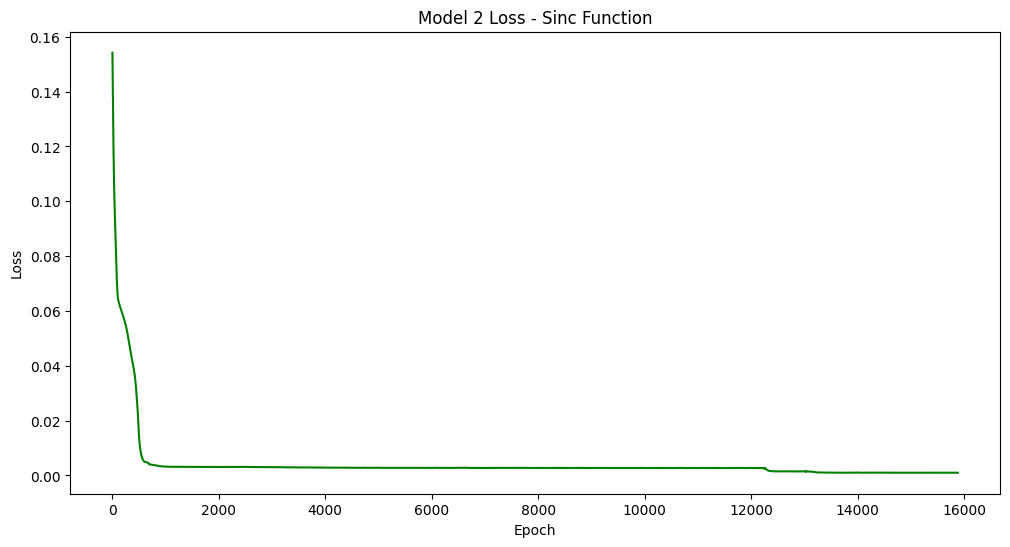

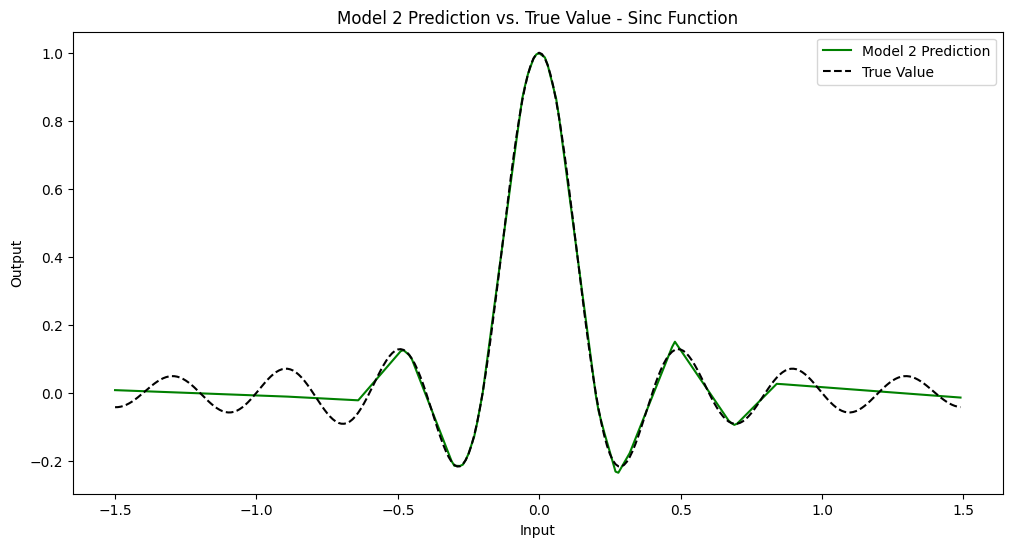

In [5]:
model_sign_2 = Model2()
m2_epoch_arr, m2_loss_arr, m2_prediction = model_train(model_sign_2, x_tensor_1, y_tensor_sinc)

plt.figure(figsize=(12,6))
plt.plot(m2_epoch_arr, m2_loss_arr, color="g")
plt.title('Model 2 Loss - Sinc Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(x_tensor_1.numpy(), m2_prediction.data.numpy(), color="g", label='Model 2 Prediction')
plt.plot(x_tensor_1.numpy(), y_tensor_sinc.numpy(), color="black", linestyle='--', label='True Value')
plt.title('Model 2 Prediction vs. True Value - Sinc Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()


Epoch: 1, Loss: 0.062011
Epoch: 500, Loss: 0.012448
Epoch: 1000, Loss: 0.004640
Epoch: 1500, Loss: 0.003297
Epoch: 2000, Loss: 0.002683
Epoch: 2500, Loss: 0.002365
Epoch: 3000, Loss: 0.002149
Epoch: 3500, Loss: 0.001976
Epoch: 4000, Loss: 0.001824
Epoch: 4500, Loss: 0.001697
Epoch: 5000, Loss: 0.001593
Epoch: 5500, Loss: 0.001511
Epoch: 6000, Loss: 0.001439
Epoch: 6500, Loss: 0.001392
Epoch: 7000, Loss: 0.001339
Epoch: 7500, Loss: 0.001305
Epoch: 8000, Loss: 0.001274
Epoch: 8500, Loss: 0.001241
Epoch: 9000, Loss: 0.001219
Epoch: 9500, Loss: 0.001208
Epoch: 10000, Loss: 0.001181
Epoch: 10500, Loss: 0.001167
Epoch: 11000, Loss: 0.001153
Epoch: 11500, Loss: 0.001137
Epoch: 12000, Loss: 0.001125
Epoch: 12500, Loss: 0.001115
Epoch: 13000, Loss: 0.001105
Epoch: 13500, Loss: 0.001097
Epoch: 14000, Loss: 0.001089
Epoch: 14500, Loss: 0.001082
Epoch: 15000, Loss: 0.001078
Epoch: 15500, Loss: 0.001071
Epoch: 16000, Loss: 0.001065
Epoch: 16500, Loss: 0.001078
Epoch: 17000, Loss: 0.001094
Epoch: 17

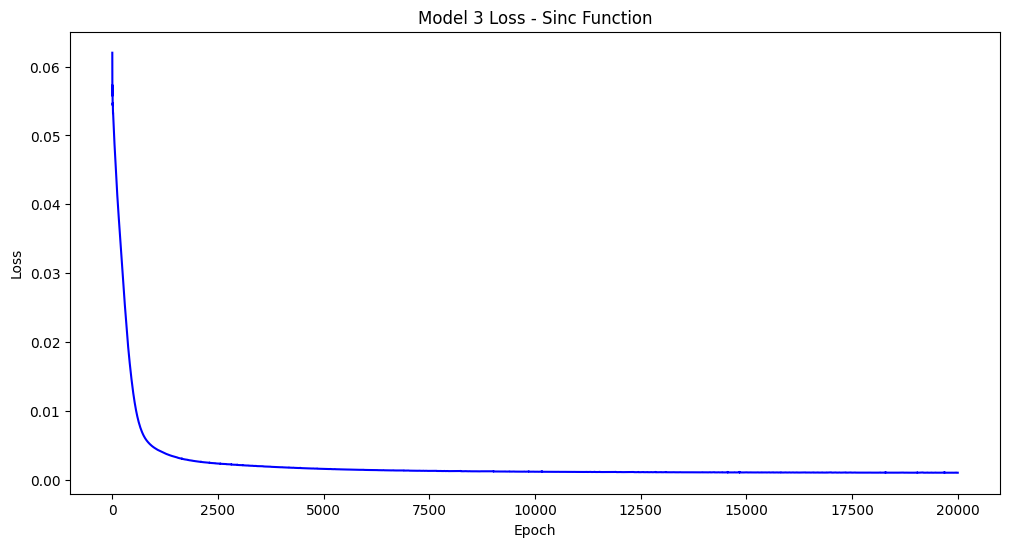

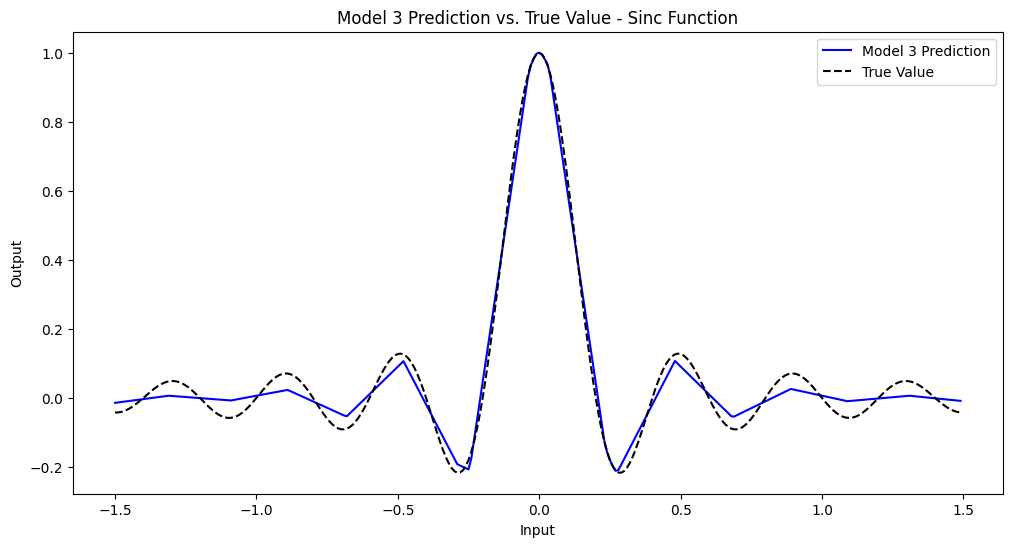

In [6]:
model_sign_3 = Model3()
m3_epoch_arr, m3_loss_arr, m3_prediction = model_train(model_sign_3, x_tensor_1, y_tensor_sinc)

plt.figure(figsize=(12,6))
plt.plot(m3_epoch_arr, m3_loss_arr, color="b")
plt.title('Model 3 Loss - Sinc Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(x_tensor_1.numpy(), m3_prediction.data.numpy(), color="b", label='Model 3 Prediction')
plt.plot(x_tensor_1.numpy(), y_tensor_sinc.numpy(), color="black", linestyle='--', label='True Value')
plt.title('Model 3 Prediction vs. True Value - Sinc Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()


Epoch: 1, Loss: 1.205411
Epoch: 500, Loss: 1.000120
Epoch: 1000, Loss: 1.000002
Epoch: 1500, Loss: 1.000001
Epoch: 2000, Loss: 1.000000
Epoch: 2500, Loss: 1.000000
Epoch: 3000, Loss: 1.000000
Epoch: 3500, Loss: 1.000000
Epoch: 4000, Loss: 1.000000
Epoch: 4500, Loss: 0.999999
Epoch: 5000, Loss: 1.000000
Epoch: 5500, Loss: 1.000000
Epoch: 6000, Loss: 1.000000
Epoch: 6500, Loss: 1.000000
Epoch: 7000, Loss: 1.000000
Epoch: 7500, Loss: 1.000000
Epoch: 8000, Loss: 1.000000
Epoch: 8500, Loss: 1.000000
Epoch: 9000, Loss: 1.000000
Epoch: 9500, Loss: 1.000000
Epoch: 10000, Loss: 1.000000
Epoch: 10500, Loss: 1.000000
Epoch: 11000, Loss: 1.000000
Epoch: 11500, Loss: 1.000000
Epoch: 12000, Loss: 1.000000
Epoch: 12500, Loss: 1.000000
Epoch: 13000, Loss: 1.000000
Epoch: 13500, Loss: 1.000000
Epoch: 14000, Loss: 1.000000
Epoch: 14500, Loss: 1.000000
Epoch: 15000, Loss: 1.000000
Epoch: 15500, Loss: 1.000000
Epoch: 16000, Loss: 1.000000
Epoch: 16500, Loss: 1.000000
Epoch: 17000, Loss: 1.000000
Epoch: 17

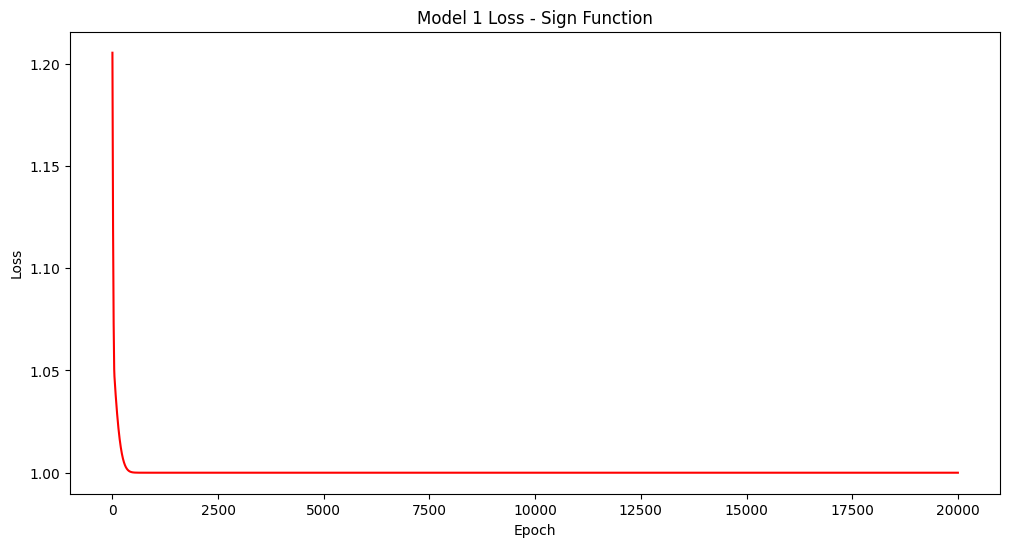

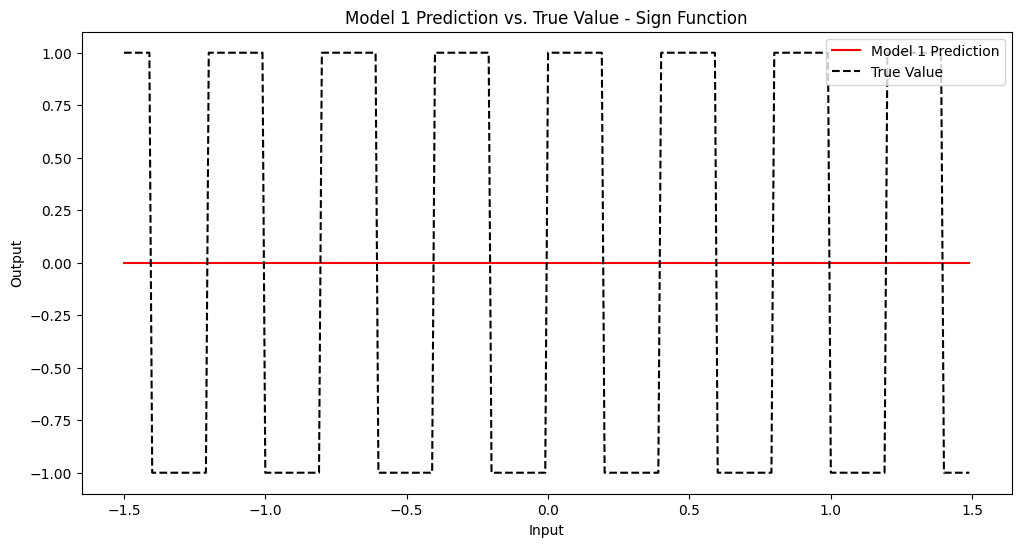

In [7]:
model_sign_1 = Model1()  # Reinitialize to reset weights
m1_epoch_arr_sign, m1_loss_arr_sign, m1_prediction_sign = model_train(model_sign_1, x_tensor_2, y_tensor_sign)

plt.figure(figsize=(12,6))
plt.plot(m1_epoch_arr_sign, m1_loss_arr_sign, color="r")
plt.title('Model 1 Loss - Sign Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(x_tensor_2.numpy(), m1_prediction_sign.data.numpy(), color="r", label='Model 1 Prediction')
plt.plot(x_tensor_2.numpy(), y_tensor_sign.numpy(), color="black", linestyle='--', label='True Value')
plt.title('Model 1 Prediction vs. True Value - Sign Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()


Epoch: 1, Loss: 1.041332
Epoch: 500, Loss: 0.738391
Epoch: 1000, Loss: 0.325633
Epoch: 1500, Loss: 0.299352
Epoch: 2000, Loss: 0.282648
Epoch: 2500, Loss: 0.273952
Epoch: 3000, Loss: 0.268492
Epoch: 3500, Loss: 0.263483
Epoch: 4000, Loss: 0.262928
Epoch: 4500, Loss: 0.258726
Epoch: 5000, Loss: 0.171958
Epoch: 5500, Loss: 0.126929
Epoch: 6000, Loss: 0.115739
Epoch: 6500, Loss: 0.111381
Epoch: 7000, Loss: 0.107278
Epoch: 7500, Loss: 0.104962
Epoch: 8000, Loss: 0.110666
Epoch: 8500, Loss: 0.101582
Epoch: 9000, Loss: 0.101113
Epoch: 9500, Loss: 0.100507
Epoch: 10000, Loss: 0.101935
Epoch: 10500, Loss: 0.105694
Epoch: 11000, Loss: 0.098641
Epoch: 11500, Loss: 0.103493
Epoch: 12000, Loss: 0.094833
Epoch: 12500, Loss: 0.094998
Epoch: 13000, Loss: 0.093686
Epoch: 13500, Loss: 0.091251
Epoch: 14000, Loss: 0.100276
Epoch: 14500, Loss: 0.092661
Epoch: 15000, Loss: 0.087616
Epoch: 15500, Loss: 0.091194
Epoch: 16000, Loss: 0.085673
Epoch: 16500, Loss: 0.089466
Epoch: 17000, Loss: 0.088956
Epoch: 17

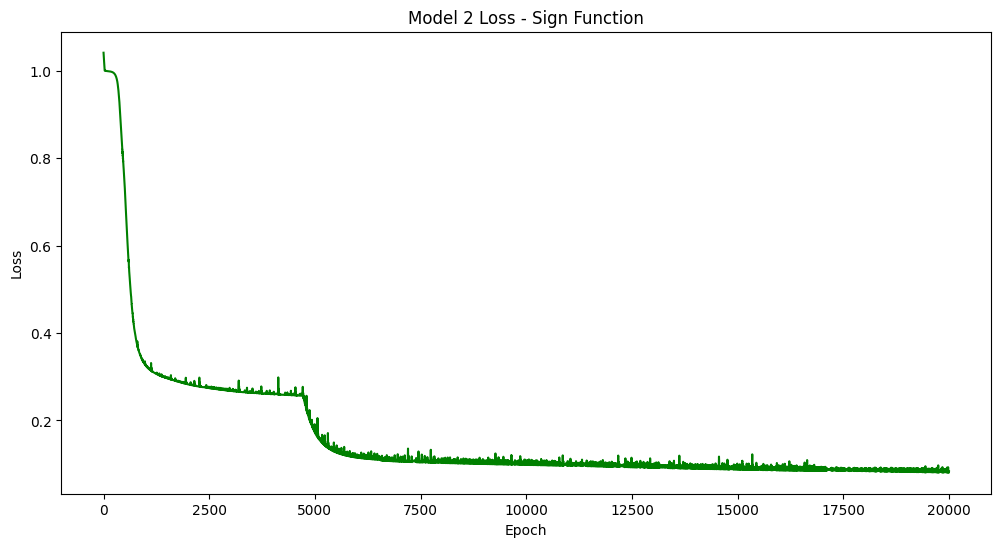

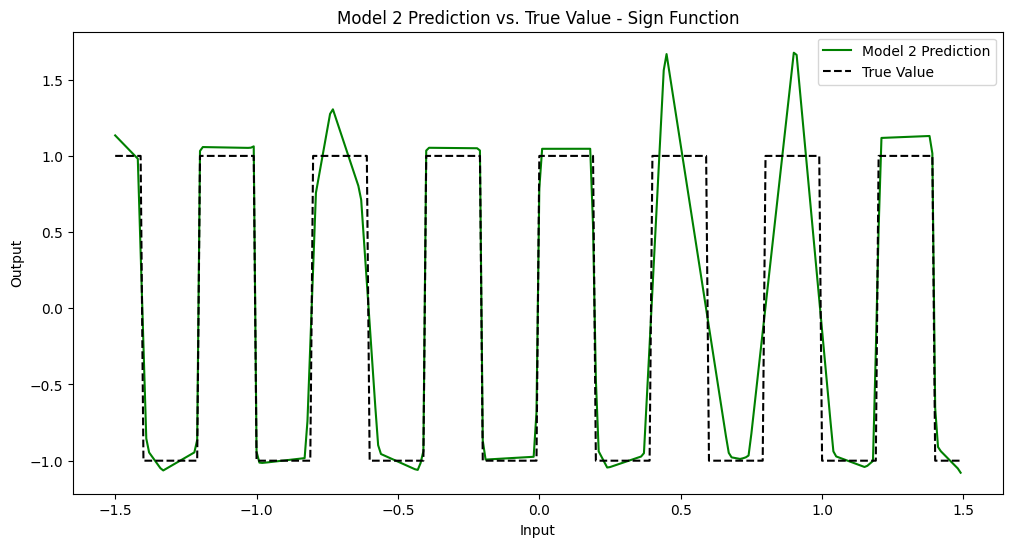

In [8]:
model_sign_2 = Model2()  # Reinitialize to reset weights
m2_epoch_arr_sign, m2_loss_arr_sign, m2_prediction_sign = model_train(model_sign_2, x_tensor_2, y_tensor_sign)

plt.figure(figsize=(12,6))
plt.plot(m2_epoch_arr_sign, m2_loss_arr_sign, color="g")
plt.title('Model 2 Loss - Sign Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(x_tensor_2.numpy(), m2_prediction_sign.data.numpy(), color="g", label='Model 2 Prediction')
plt.plot(x_tensor_2.numpy(), y_tensor_sign.numpy(), color="black", linestyle='--', label='True Value')
plt.title('Model 2 Prediction vs. True Value - Sign Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()


Epoch: 1, Loss: 1.072477
Epoch: 500, Loss: 0.941286
Epoch: 1000, Loss: 0.767819
Epoch: 1500, Loss: 0.557908
Epoch: 2000, Loss: 0.408956
Epoch: 2500, Loss: 0.327657
Epoch: 3000, Loss: 0.285228
Epoch: 3500, Loss: 0.261395
Epoch: 4000, Loss: 0.246237
Epoch: 4500, Loss: 0.234314
Epoch: 5000, Loss: 0.225237
Epoch: 5500, Loss: 0.218388
Epoch: 6000, Loss: 0.212879
Epoch: 6500, Loss: 0.207231
Epoch: 7000, Loss: 0.202102
Epoch: 7500, Loss: 0.197207
Epoch: 8000, Loss: 0.193821
Epoch: 8500, Loss: 0.190973
Epoch: 9000, Loss: 0.188629
Epoch: 9500, Loss: 0.186704
Epoch: 10000, Loss: 0.184914
Epoch: 10500, Loss: 0.183170
Epoch: 11000, Loss: 0.181813
Epoch: 11500, Loss: 0.180555
Epoch: 12000, Loss: 0.179448
Epoch: 12500, Loss: 0.178493
Epoch: 13000, Loss: 0.176028
Epoch: 13500, Loss: 0.174864
Epoch: 14000, Loss: 0.173822
Epoch: 14500, Loss: 0.172866
Epoch: 15000, Loss: 0.172083
Epoch: 15500, Loss: 0.171163
Epoch: 16000, Loss: 0.170415
Epoch: 16500, Loss: 0.169621
Epoch: 17000, Loss: 0.168952
Epoch: 17

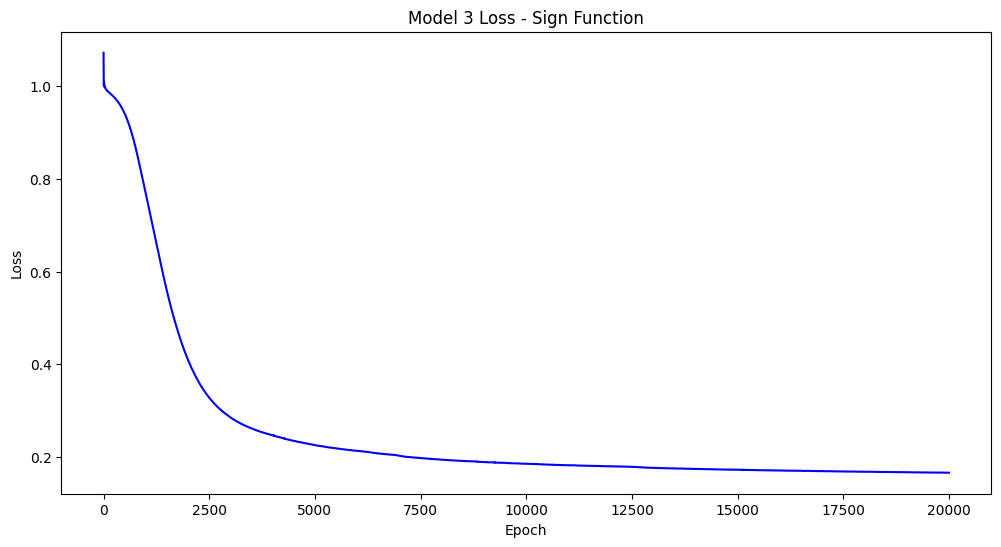

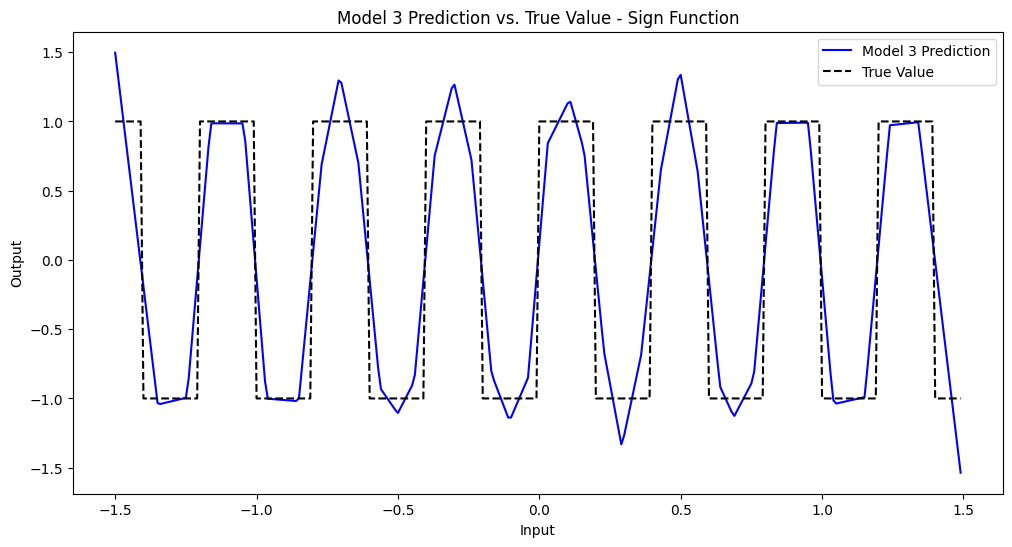

In [9]:
model_sign_3 = Model3()  # Reinitialize to reset weights
m3_epoch_arr_sign, m3_loss_arr_sign, m3_prediction_sign = model_train(model_sign_3, x_tensor_2, y_tensor_sign)

plt.figure(figsize=(12,6))
plt.plot(m3_epoch_arr_sign, m3_loss_arr_sign, color="b")
plt.title('Model 3 Loss - Sign Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(x_tensor_2.numpy(), m3_prediction_sign.data.numpy(), color="b", label='Model 3 Prediction')
plt.plot(x_tensor_2.numpy(), y_tensor_sign.numpy(), color="black", linestyle='--', label='True Value')
plt.title('Model 3 Prediction vs. True Value - Sign Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()
